# Regression in Sciket_learn

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
# import dataset

df = sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# simple linear regression
df_linear = df[["age", "fare"]]

In [13]:
#simple linear regression
X = df_linear[["age"]]
y = df_linear["fare"]


In [14]:
X.isnull().sum() / len(X)*100

age    19.86532
dtype: float64

In [15]:
y.isnull().sum() / len(y)*100

0.0

In [16]:
X["age"] = X["age"].fillna(value= X["age"].mean())

C:\Users\qadir\AppData\Local\Temp\ipykernel_17496\4204164607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"] = X["age"].fillna(value= X["age"].mean())


In [17]:
X.isnull().sum() / len(X)*100

age    0.0
dtype: float64

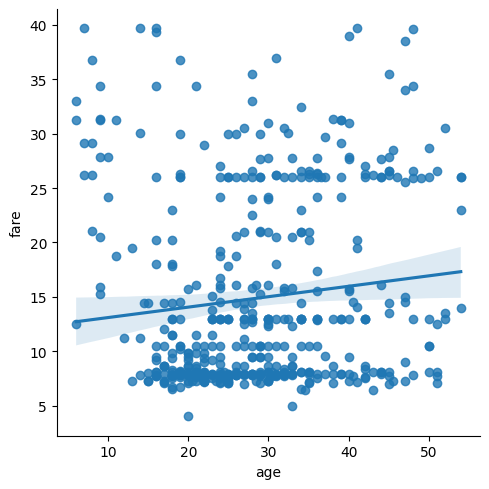

In [37]:
# Plot
sns.lmplot(x="age", y="fare", data=df_linear)

<AxesSubplot: ylabel='age'>

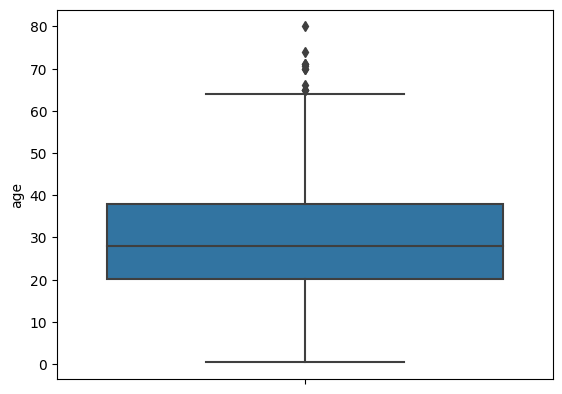

In [27]:
sns.boxplot(y="age", data=df_linear)

In [28]:
df_linear = df_linear[(df_linear["age"]>5)&(df_linear["age"]<55)]

<AxesSubplot: ylabel='age'>

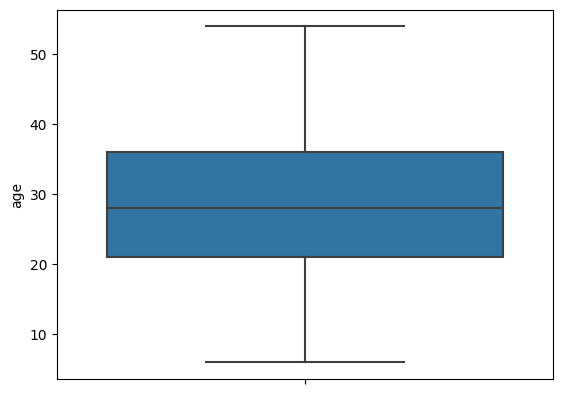

In [30]:
sns.boxplot(y="age", data=df_linear)

<AxesSubplot: ylabel='fare'>

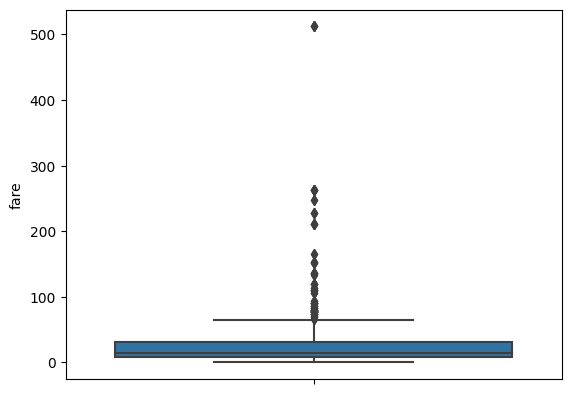

In [31]:
sns.boxplot(y="fare", data=df_linear)

In [33]:
df_linear["fare"].min()

0.0

In [34]:
df_linear = df_linear[(df_linear["fare"]>1)&(df_linear["fare"]<40)]

<AxesSubplot: ylabel='fare'>

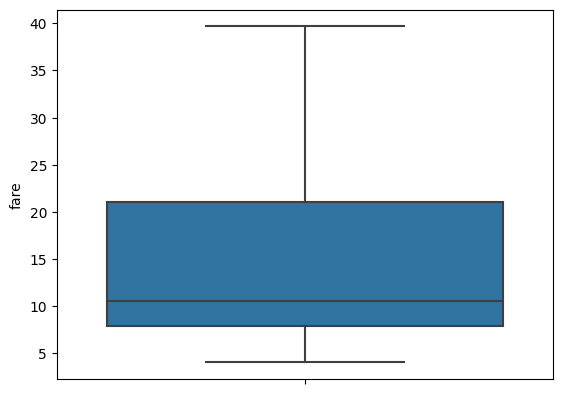

In [35]:
sns.boxplot(y="fare", data=df_linear)

In [39]:
X = df_linear[["age"]]
y = df_linear["fare"]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# call the model
model = LinearRegression()

# train the model
model.fit(X,y)

#prediction
model.predict([[80]])

LinearRegression()

In [49]:
# model evaluation with metrics
# R2
# mean square error
# MAE
# RMSE

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8)
# model
model = LinearRegression()
# train
model.fit(X_train, y_train)
# prediction
predictions = model.predict(X_test)



<AxesSubplot: xlabel='fare'>

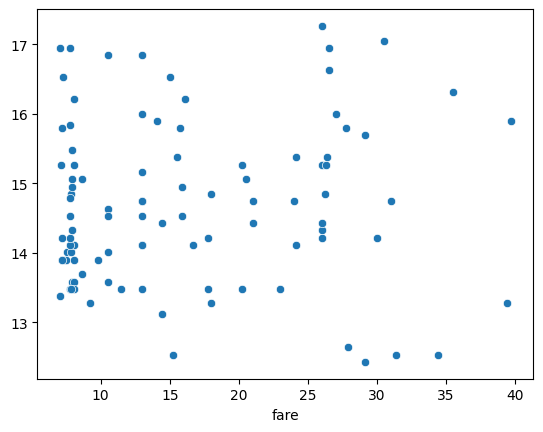

In [50]:
#compare
sns.scatterplot(x=y_test, y=predictions)

In [51]:
model.score(X_test,y_test)

-0.02566048911640939

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE = mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE = mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=y_test, y_pred=predictions, squared = False)
R2= r2_score(y_true=y_test, y_pred=predictions)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2_squared:", R2)



MAE:  7.228288954939239
MSE:  78.63379773898127
RMSE:  8.867570001921681
R2_squared: -0.02566048911640939


In [58]:
import numpy as np
RSME = np.sqrt(MSE)
RMSE

8.867570001921681